In [1]:
from tdc.single_pred import ADME
data = ADME(name = 'PAMPA_NCATS')
split = data.get_split()

Found local copy...
Loading...
Done!


In [2]:
#from tdc.single_pred import ADME
#data = ADME(name = 'HIA_Hou')
#split = data.get_split()

In [3]:
'''from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(split['train'].Drug)
sequences = tokenizer.texts_to_sequences(split['train'].Drug)
word_index = tokenizer.word_index 
bow = {}
for key in word_index:
    bow[key] = sequences[0].count(word_index[key])

print(f"Bag of word sentence 1:\n{bow}")
print(f'We found {len(word_index)} unique tokens.')
'''

'from keras.preprocessing.text import Tokenizer\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(split[\'train\'].Drug)\nsequences = tokenizer.texts_to_sequences(split[\'train\'].Drug)\nword_index = tokenizer.word_index \nbow = {}\nfor key in word_index:\n    bow[key] = sequences[0].count(word_index[key])\n\nprint(f"Bag of word sentence 1:\n{bow}")\nprint(f\'We found {len(word_index)} unique tokens.\')\n'

In [4]:
split['train'].head(30)

,Drug_ID,Drug,Y
0,1259573,COC1=C(C=C(C=C1)CCN2C(=CC(=O)NC2=S)N)OC,0
1,1275864,COC1=C(C=C(C=C1)Cl)C(=O)NC2=CC=C(C=C2)NC(=O)C3...,1
2,2030130,CN1C2=CC=CC=C2C(=O)C3=C1N=C(N(C3=O)C4=CC=CC=C4...,1
3,4422695,CC1=C(C=C(C=C1)NS(=O)(=O)C2=CC=CC(=C2)C(=O)O)S...,1
4,1131802,COC1=CC(=CC(=C1O)OC)C2=NC(=C(N2)C3=CC=CS3)C4=C...,1
5,759785,CN(C)C1=C2C(=C(SC2=NC=C1)C(=O)N)N,1
6,1489415,C1=CC=C2C(=C1)C(=N)N(N=N2)C3=CC=C(C=C3)C(F)(F)F,1
7,1075912,C1=CC=C2C(=C1)C=C(C(=O)O2)C3=CSC(=N3)NC4=CC(=C...,0
8,15740787,C[N+]1=C2N(C3=CC=CC=C31)N=C(CS2)C4=CC=C(C=C4)O...,0
9,16682542,CCO.C1=CC=C2C=C(C=CC2=C1)SC3=CC4=C(C=C3)N=C(N=...,1


In [5]:
split['train'].Y.value_counts()

1    1225
0     199
Name: Y, dtype: int64

In [6]:
split['train'][split['train'].Y==0].count()


Drug_ID    199
Drug       199
Y          199
dtype: int64

In [7]:
import numpy as np
X=np.array(split['train'].Drug).reshape(-1, 1)
y=split['train'].Y

In [8]:
X

array([['COC1=C(C=C(C=C1)CCN2C(=CC(=O)NC2=S)N)OC'],
       ['COC1=C(C=C(C=C1)Cl)C(=O)NC2=CC=C(C=C2)NC(=O)C3=CC=CO3'],
       ['CN1C2=CC=CC=C2C(=O)C3=C1N=C(N(C3=O)C4=CC=CC=C4)C5CCCCC5'],
       ...,
       ['COC(=O)CNC(=O)C1=NC(=C2N1C=CC=C2)C3=CC=C(C=C3)F'],
       ['CC1=CSC2=NC(=CN12)C3=CC(=CC=C3)NC(=O)C4=CC=CC=C4Cl'],
       ['CCNC(=O)N1CCCN(CC1)C2=C(C=C(C=C2)C(=O)NCCC3=C(C=C(C=C3)Cl)Cl)NC(=O)C4=CC(=CC=C4)Cl']],
      dtype=object)

In [9]:
## If class balancing is not done it will just predict one label that is the majority label.

from sklearn.utils import resample
import pandas as pd
df_majority = split['train'][split['train'].Y==1]
df_minority = split['train'][split['train'].Y==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled

,Drug_ID,Drug,Y
1,1275864,COC1=C(C=C(C=C1)Cl)C(=O)NC2=CC=C(C=C2)NC(=O)C3...,1
2,2030130,CN1C2=CC=CC=C2C(=O)C3=C1N=C(N(C3=O)C4=CC=CC=C4...,1
3,4422695,CC1=C(C=C(C=C1)NS(=O)(=O)C2=CC=CC(=C2)C(=O)O)S...,1
4,1131802,COC1=CC(=CC(=C1O)OC)C2=NC(=C(N2)C3=CC=CS3)C4=C...,1
5,759785,CN(C)C1=C2C(=C(SC2=NC=C1)C(=O)N)N,1
...,...,...,...
188,2566614,C1=CC=C(C=C1)C2=CSC(=N2)NC(=O)C3=CC=CC=C3N4C=N...,0
1310,127030711,C1=CC=C(C=C1)CCCNC(=O)C2=CC=CC(=C2)C3=CC(=C4C(...,0
256,70789460,C1=CC=C(C=C1)C2=CSC(=N2)NS(=O)(=O)C3=CC=C(C=C3...,0
241,70701402,C1CN(CCN1)C2=CC=C(C=C2)N[S+](=O)(C3=CC=C(C=C3)...,0


In [10]:
X=np.array(df_upsampled.Drug).reshape(-1, 1)
y=df_upsampled.Y

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
CountVec = CountVectorizer()
#transform
Count_data = CountVec.fit_transform(df_upsampled.Drug)
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray())
print(cv_dataframe.head(10),len(cv_dataframe))

   0    1    2    3    4    5    6    7    8    9    ...  725  726  727  728  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    1    0   
5    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    1   
7    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
8    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
9    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   729  730  731  732  733  734  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cv_dataframe, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=8)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=8)

In [14]:
ypred=clf.predict(X_test)

In [15]:
clf.score(X_test,y_test)

0.7639060568603214

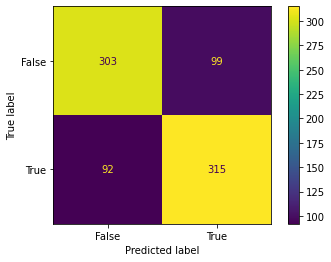

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, ypred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [17]:
### As the classes are imbalanced and i have artificially included more classes i want to know the precision for both label
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


precision = precision_score(y_test, ypred, average='binary', pos_label=1)
print('Precision for label 1: %.3f' % precision)

precision = precision_score(y_test, ypred, average='binary', pos_label=0)
print('Precision for label 0: %.3f' % precision)

recall = recall_score(y_test, ypred, average='binary')
print('Recall: %.3f' % recall)
score = f1_score(y_test, ypred, average='binary')
print('F-Measure: %.3f' % score)

print(classification_report(y_test, ypred))

Precision for label 1: 0.761
Precision for label 0: 0.767
Recall: 0.774
F-Measure: 0.767
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       402
           1       0.76      0.77      0.77       407

    accuracy                           0.76       809
   macro avg       0.76      0.76      0.76       809
weighted avg       0.76      0.76      0.76       809



In [18]:
'''from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding

model_name = "ydshieh/tiny-random-gptj-for-sequence-classification"

tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer.pad_token = tokenizer.eos_token

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-18-0e399be15dc0>, line 7)

In [ ]:
import tensorflow as tf
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.squeeze(tf.gather(x, input_node_indices))
        # Compute logits
        return self.compute_logits(node_embeddings)

In [ ]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()



In [ ]:
def tokenize_function(examples):
  return tokenizer(examples, truncation = True, max_length = 512, padding = True)
tokenized_datasets = split['train']["Drug"].map(tokenize_function)
tokenized_datasets["Drugi"] = split['train']["Drug"].map(tokenize_function)

In [ ]:
#df_upsampled=df_upsampled.merge(tokenized_datasets.to_frame(), left_index=True, right_index=True)
#df_upsampled.head()

In [ ]:
split['train']['tok']=tokenized_datasets['Drugi']
newd=split['train'][['tok','Y']]
newd = newd.rename(columns={"Y":"labels"})


In [ ]:
newd=newd[0:1000]
print(newd.head(24))

In [ ]:
len(newd)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# resize model embedding to match new tokenizer
model.resize_token_embeddings(len(tokenizer))

In [ ]:
df_upsampled.head(24)

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits[0], axis = -1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  evaluation_strategy="epoch",
                                  fp16 = True,
                                  per_device_train_batch_size= 1,
                                  per_device_eval_batch_size= 1
                                  )

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=newd,
    eval_dataset=newd,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from spektral.layers import GCNConv, GlobalSumPool

In [ ]:
class MyFirstGNN(Model):

    def __init__(self, n_hidden, n_labels):
        super().__init__()
        self.graph_conv = GCNConv(n_hidden)
        self.pool = GlobalSumPool()
        self.dropout = Dropout(0.5)
        self.dense = Dense(n_labels, 'softmax')

    def call(self, inputs):
        out = self.graph_conv(inputs)
        out = self.dropout(out)
        out = self.pool(out)
        out = self.dense(out)

        return out

In [ ]:
model = MyFirstGNN(32,2)
model.compile('adam', 'categorical_crossentropy')

In [ ]:
from spektral.data import BatchLoader

loader = BatchLoader(split['train'], batch_size=32)

In [ ]:
import torch
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

In [ ]:
print(cv_dataframe)

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(df_upsampled,'Drug','Y')


In [ ]:
import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
generator = FullBatchNodeGenerator(sg(df_upsampled), method="gcn")


In [ ]:
from spektral.data import BatchLoader

loader = BatchLoader(G, batch_size=32)

In [ ]:
model.fit(split['train'])

In [ ]:
from torch_geometric.data import Data


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased")

In [ ]:
df=df_upsampled[['Drug','Y']]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples, truncation=True)
tokenized = df_upsampled['Drug'].map(preprocess_function)
df_upsampled['Drugi']=tokenized

In [ ]:
print(df_upsampled)

In [ ]:
X_train=df_upsampled[['Drugi','Y']][:1200]
X_test=df_upsampled[['label','Y']][1200:]

In [ ]:
print(X_train.iloc[685])

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    print(predictions)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:


trainer = Trainer(
    model=model,
    train_dataset=X_train,
    eval_dataset=X_test,
    tokenizer=tokenizer
)

trainer.train()

In [ ]:
from transformers import TFAutoModel, AutoTokenizer
import tensorflow as tf

bert = TFAutoModel.from_pretrained("bert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
def tokenize(sentence):
    tokens = tokenizer.encode_plus(sentence, max_length=SEQ_LEN,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')
    return tokens['input_ids'], tokens['attention_mask']
SEQ_LEN=50
Xids = np.zeros((len(df_upsampled), SEQ_LEN))
Xmask = np.zeros((len(df_upsampled), SEQ_LEN))
labels=df_upsampled['Y']
# loop through data and tokenize everything
for i, sentence in enumerate(df_upsampled['Drug']):
    Xids[i, :], Xmask[i, :] = tokenize(sentence)
    
    
    
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

# restructure dataset format for BERT
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels
  
dataset = dataset.map(map_func)  # apply the mapping function

# shuffle and batch the dataset
dataset = dataset.shuffle(10000).batch(32)

DS_LEN = len(list(dataset))  # get dataset length

SPLIT = 0.9  # we will create a 90-10 split

# create training-validation sets
train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))

# free up space
del dataset

# build the model
input_ids = tf.keras.layers.Input(shape=(50,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(50,), name='attention_mask', dtype='int32')



embeddings = bert(input_ids, attention_mask=mask)[0]  # we only keep tensor 0 (last_hidden_state)

X = tf.keras.layers.GlobalMaxPool1D()(embeddings)  # reduce tensor dimensionality
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(1, activation='softmax', name='outputs')(X)  # adjust based on number of sentiment classes

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# freeze the BERT layer
model.layers[2].trainable = False

# compile the model
optimizer = tf.keras.optimizers.Adam(0.00001)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

# and train it
history = model.fit(train, epochs=20)

In [ ]:
model.predict(val)

In [ ]:
import torch
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 'relu')
        self.conv2 = GCNConv(16, 'softmax')

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = df_upsampled
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()